In [5]:
%load_ext autoreload
%autoreload 2

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import matplotlib.pyplot as plt
import jax
from jax import numpy as jnp
from jax import random
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from clu import preprocess_spec, parameter_overview

from src.utils import preprocess as preprocess_utils
from src.utils import plotting as plotting_utils
from src.utils import input as input_utils

from src.transformations.affine import rotate_image, affine_transform_image
from src.transformations.color import color_transform_image, hsv_transform_image
from src.transformations import transform_image

jax.config.update('jax_platform_name', 'cpu')

In [6]:
rng = random.PRNGKey(0)

2023-06-19 18:05:18.578020: E external/org_tensorflow/tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


## Test a few transformations on MNIST

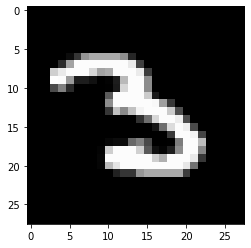

In [4]:
pp_train = f'to_rgb|value_range(-1, 1)|keep(["image"])'

ds = input_utils.get_data('mnist', 'train', rng, 256, preprocess_spec.parse(
          spec=pp_train, available_ops=preprocess_utils.all_ops()))
ds = input_utils.start_input_pipeline(ds, 1)

x_og = next(ds)['image'][0, 1]
plt.imshow(plotting_utils.rescale_for_imshow(x_og))

2023-06-19 12:18:02.092616: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


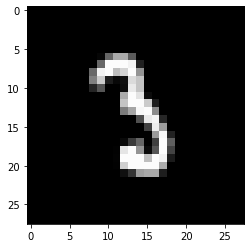

In [5]:
pp_train = f'to_rgb|random_zoom({jnp.log(2)}, {jnp.log(2)}, 0., 0.)|value_range(-1, 1)|keep(["image"])'

ds = input_utils.get_data('mnist', 'train', rng, 256, preprocess_spec.parse(
            spec=pp_train, available_ops=preprocess_utils.all_ops()))
ds = input_utils.start_input_pipeline(ds, 1)

x = next(ds)['image'][0, 1]
plt.imshow(plotting_utils.rescale_for_imshow(x))

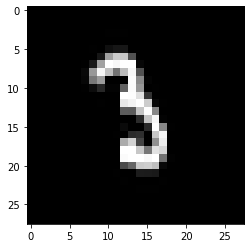

In [6]:
plt.imshow(plotting_utils.rescale_for_imshow(affine_transform_image(x_og, jnp.array([0, 0, 0, jnp.log(2.), 0., 0, 0]))))

2023-06-19 12:18:05.675991: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


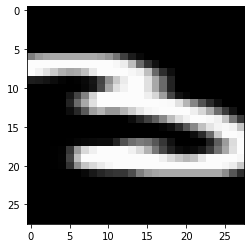

In [7]:
pp_train = f'to_rgb|random_zoom({jnp.log(.5)}, {jnp.log(.5)}, 0., 0.)|value_range(-1, 1)|keep(["image"])'

ds = input_utils.get_data('mnist', 'train', rng, 256, preprocess_spec.parse(
          spec=pp_train, available_ops=preprocess_utils.all_ops()))
ds = input_utils.start_input_pipeline(ds, 1)

x = next(ds)['image'][0, 1]
plt.imshow(plotting_utils.rescale_for_imshow(x))

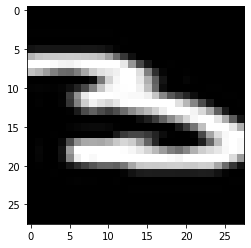

In [8]:
plt.imshow(plotting_utils.rescale_for_imshow(affine_transform_image(x_og, jnp.array([0, 0, 0, jnp.log(0.5), 0., 0, 0]))))

2023-06-19 12:18:06.809620: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


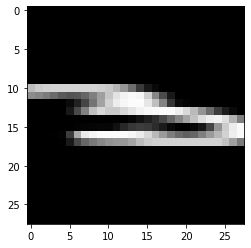

In [9]:
pp_train = f'to_rgb|random_zoom({jnp.log(.5)}, {jnp.log(.5)}, {jnp.log(2.)}, {jnp.log(2.)})|value_range(-1, 1)|keep(["image"])'

ds = input_utils.get_data('mnist', 'train', rng, 256, preprocess_spec.parse(
          spec=pp_train, available_ops=preprocess_utils.all_ops()))
ds = input_utils.start_input_pipeline(ds, 1)

x = next(ds)['image'][0, 1]
plt.imshow(plotting_utils.rescale_for_imshow(x))

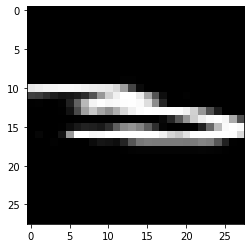

In [10]:
plt.imshow(plotting_utils.rescale_for_imshow(affine_transform_image(x_og, jnp.array([0, 0, 0, jnp.log(.5), jnp.log(2.), 0, 0]))))

2023-06-19 12:18:08.640247: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


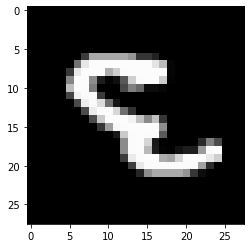

In [11]:
pp_train = f'to_rgb|random_rotate(180, 180)|value_range(-1, 1)|keep(["image"])'

ds = input_utils.get_data('mnist', 'train', rng, 256, preprocess_spec.parse(
          spec=pp_train, available_ops=preprocess_utils.all_ops()))
ds = input_utils.start_input_pipeline(ds, 1)

x = next(ds)['image'][0, 1]
plt.imshow(plotting_utils.rescale_for_imshow(x))

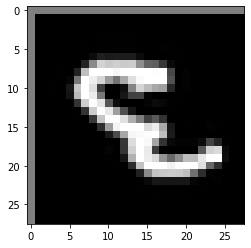

In [12]:
plt.imshow(plotting_utils.rescale_for_imshow(rotate_image(x_og, np.pi)))

In [13]:
import jax

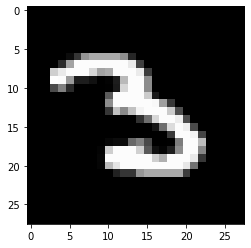

In [14]:
plt.imshow(plotting_utils.rescale_for_imshow(jax.lax.pad(x_og, -1., [(0, 0, 0), (0, 0, 0), (0, 0, 0)])))

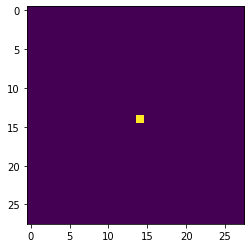

In [15]:
x_tmp = jnp.zeros((28, 28, 1))
x_tmp = x_tmp.at[14, 14, :].set(1.)
plt.imshow(x_tmp)

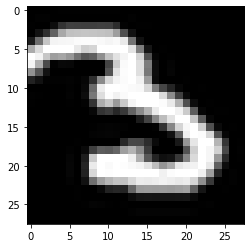

In [16]:
plt.imshow(plotting_utils.rescale_for_imshow(affine_transform_image(x_og, jnp.array([0, 0, 0, -0.33, -0.33, 0, 0]))))

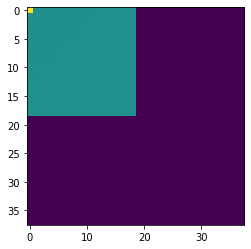

In [17]:
plt.imshow(affine_transform_image(jax.lax.pad(x_tmp, 0., [(5, 5, 0), (5, 5, 0), (0, 0, 0)]), jnp.array([jnp.log(jnp.e), jnp.log(jnp.e), 0, 0, 0, 0, 0])))

In [18]:
import distrax

In [19]:
distrax.Uniform(low=jnp.array([1., 0.]), high=jnp.array([2., 1.])).sample(seed=rng)

DeviceArray([1.2162954, 0.8041241], dtype=float32)

## Sanity check for CIFAR10

In [20]:
pp_train = f'value_range(-1, 1)|keep(["image"])'

ds = input_utils.get_data('cifar10', 'train', rng, 256, preprocess_spec.parse(
          spec=pp_train, available_ops=preprocess_utils.all_ops()))
ds = input_utils.start_input_pipeline(ds, 1)

x = next(ds)['image'][0, 0]
plt.imshow(plotting_utils.rescale_for_imshow(x))

2023-06-19 12:18:16.683291: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


AssertionError: Dataset cifar10: could not find data in /home/jua23/tensorflow_datasets. Please make sure to call dataset_builder.download_and_prepare(), or pass download=True to tfds.load() before trying to access the tf.data.Dataset object.

2023-04-27 15:02:25.775574: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


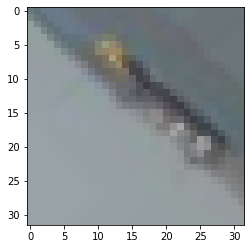

In [ ]:
pp_train = f'value_range(-1, 1)|random_rotate(135, 135)|keep(["image"])'

ds = input_utils.get_data('cifar10', 'train', rng, 256, preprocess_spec.parse(
          spec=pp_train, available_ops=preprocess_utils.all_ops()))
ds = input_utils.start_input_pipeline(ds, 1)

x = next(ds)['image'][0, 0]
plt.imshow(plotting_utils.rescale_for_imshow(x))

## Check that batches are constructed appropriately 

Simulate training data with 1 aug per example

Epoch 1, batch 1


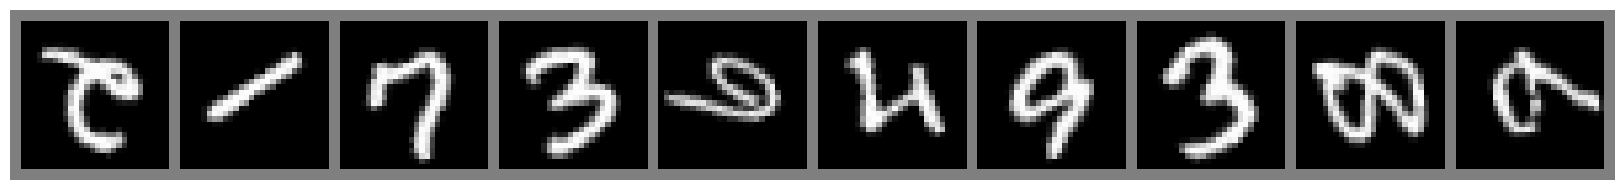

Epoch 1, batch 2


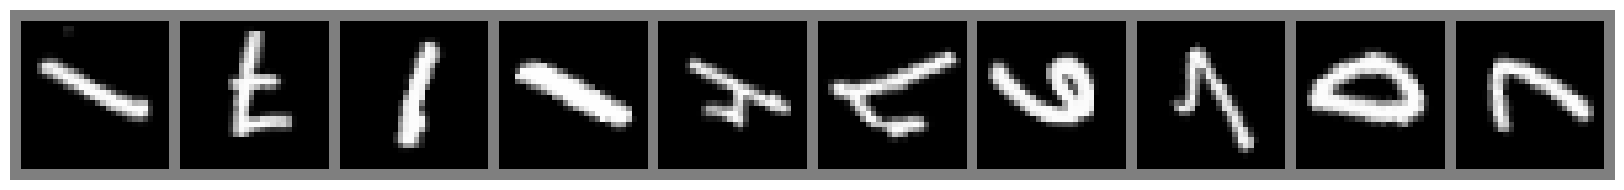

Epoch 2, batch 1


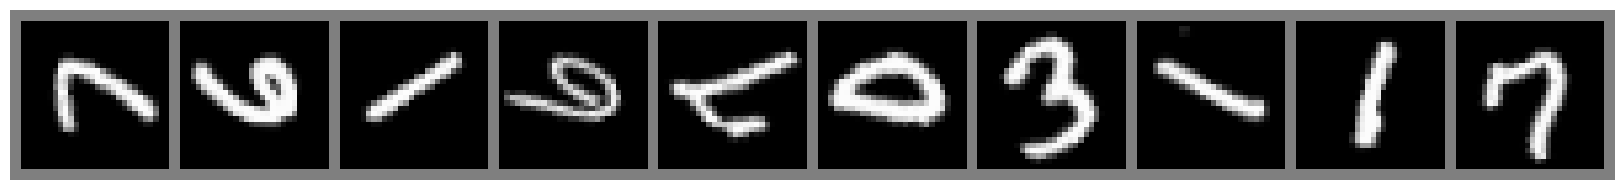

Epoch 2, batch 2


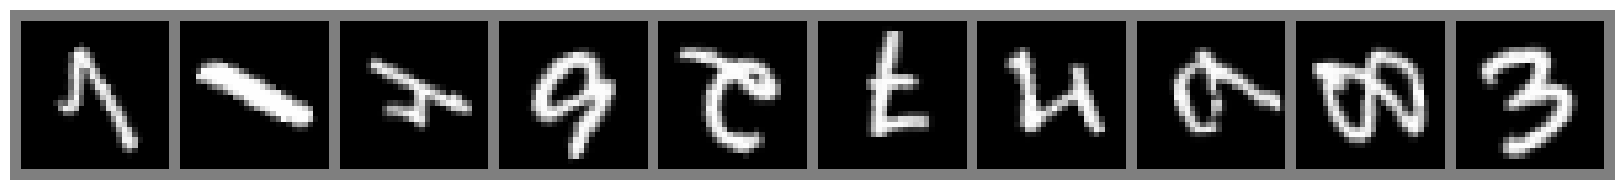

In [23]:
pp_train = f'value_range(-1, 1)|random_rotate(0, 180)|keep(["image"])'

ds = input_utils.get_data('mnist', 'train[:20]', rng, 10, preprocess_spec.parse(
          spec=pp_train, available_ops=preprocess_utils.all_ops()), repeat_after_batching=True, shuffle="preprocessed")
          # Note: repeat_after_batching must be true. Otherwise, the repeat happens before the preprocessing, which is not what we want.
ds = input_utils.start_input_pipeline(ds, 1)

print("Epoch 1, batch 1")
xs = next(ds)['image']
plotting_utils.plot_img_array(xs[0, :10], 10);

print("Epoch 1, batch 2")
xs = next(ds)['image']
plotting_utils.plot_img_array(xs[0, :10], 10);

print("Epoch 2, batch 1")
xs = next(ds)['image']
plotting_utils.plot_img_array(xs[0, :10], 10);

print("Epoch 2, batch 2")
xs = next(ds)['image']
plotting_utils.plot_img_array(xs[0, :10], 10);

Simulate training data with different data augmentations each time

Epoch 1, batch 1


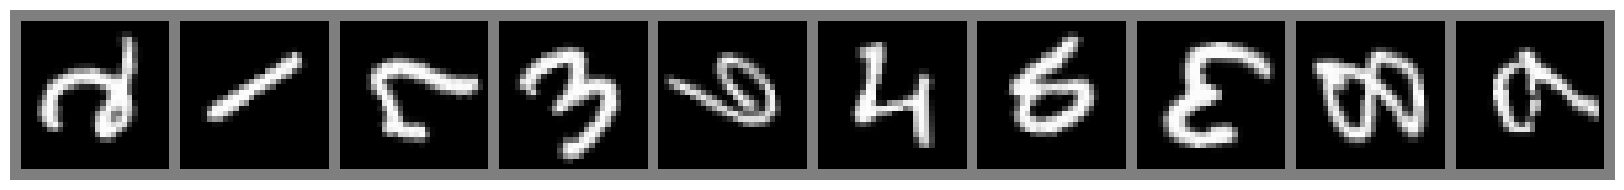

Epoch 1, batch 2


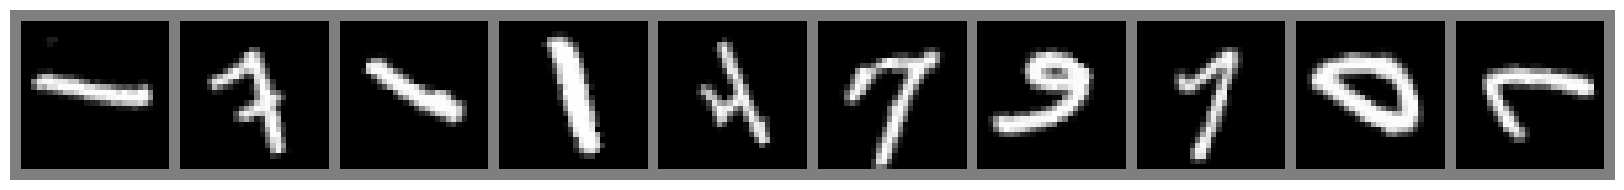

Epoch 2, batch 1


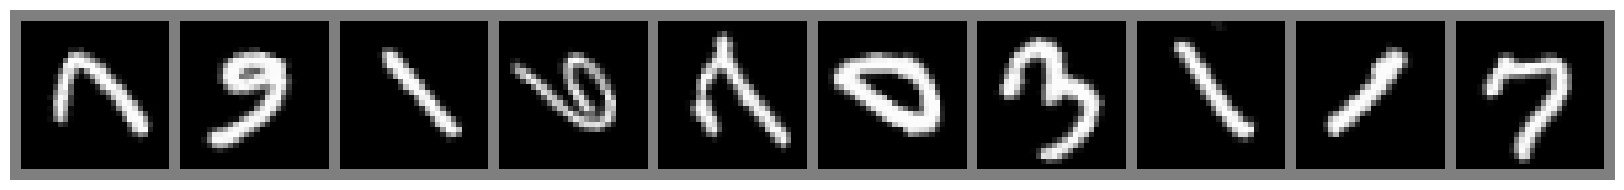

Epoch 2, batch 2


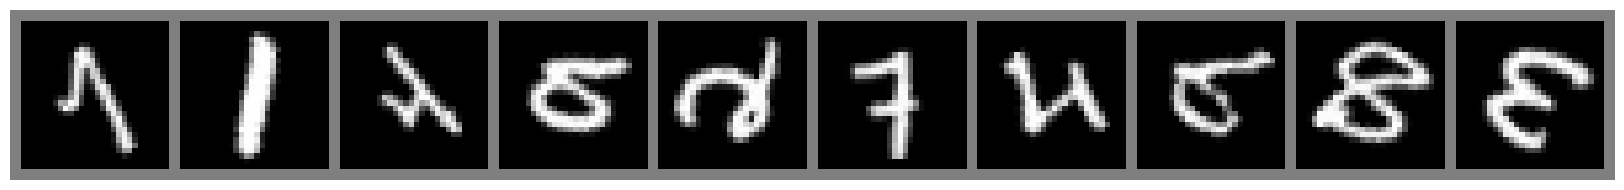

In [24]:
pp_train = f'value_range(-1, 1)|random_rotate(0, 180)|keep(["image"])'

ds = input_utils.get_data('mnist', 'train[:20]', rng, 10, preprocess_spec.parse(
          spec=pp_train, available_ops=preprocess_utils.all_ops()), repeat_after_batching=False, shuffle="loaded")
          # Note: repeat_after_batching doesn't matter here. Since the shuffle happens before the repeat in either case.
ds = input_utils.start_input_pipeline(ds, 1)

print("Epoch 1, batch 1")
xs = next(ds)['image']
plotting_utils.plot_img_array(xs[0, :10], 10);

print("Epoch 1, batch 2")
xs = next(ds)['image']
plotting_utils.plot_img_array(xs[0, :10], 10);

print("Epoch 2, batch 1")
xs = next(ds)['image']
plotting_utils.plot_img_array(xs[0, :10], 10);

print("Epoch 2, batch 2")
xs = next(ds)['image']
plotting_utils.plot_img_array(xs[0, :10], 10);

Simulate validation data with 1 augmentation per example

Epoch 1, batch 1


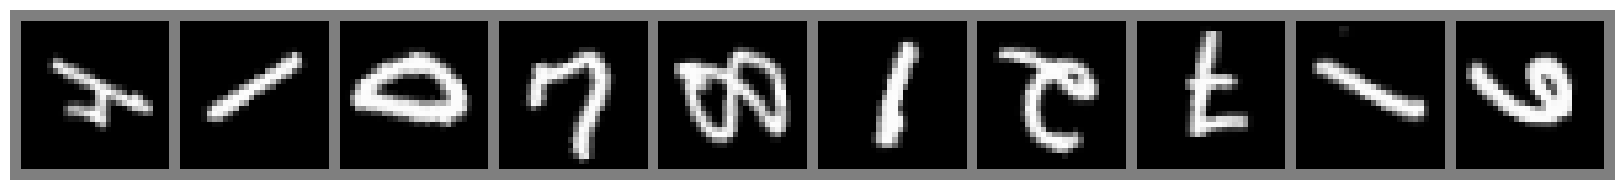

Epoch 1, batch 2


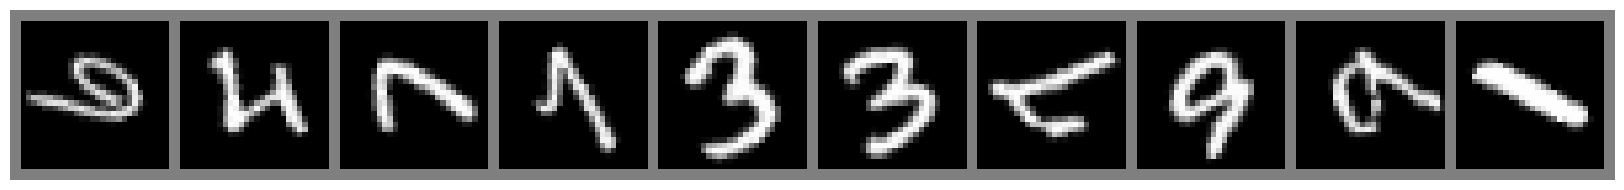

Epoch 2, batch 1
Correctly stopped iteration
Epoch 1, batch 1


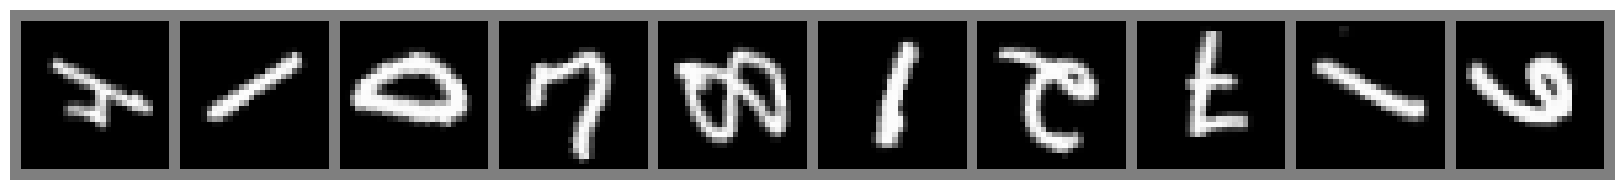

In [27]:
pp_train = f'value_range(-1, 1)|random_rotate(0, 180)|keep(["image"])'

ds = input_utils.get_data('mnist', 'train[:20]', rng, 10, preprocess_spec.parse(
          spec=pp_train, available_ops=preprocess_utils.all_ops()), repeat_after_batching=True, shuffle=False, num_epochs=1)
          # Note: repeat_after_batching doesn't matter here. Since there is no shuffle.
ds = input_utils.start_input_pipeline(ds, 1)

print("Epoch 1, batch 1")
xs = next(ds)['image']
plotting_utils.plot_img_array(xs[0, :10], 10);

print("Epoch 1, batch 2")
xs = next(ds)['image']
plotting_utils.plot_img_array(xs[0, :10], 10);

try:
    print("Epoch 2, batch 1")
    xs = next(ds)['image']
    plotting_utils.plot_img_array(xs[0, :10], 10);

    print("Epoch 2, batch 2")
    xs = next(ds)['image']
    plotting_utils.plot_img_array(xs[0, :10], 10);
except StopIteration:
    print("Correctly stopped iteration")

ds = input_utils.get_data('mnist', 'train[:20]', rng, 10, preprocess_spec.parse(
          spec=pp_train, available_ops=preprocess_utils.all_ops()), repeat_after_batching=False, shuffle=False, num_epochs=1)
ds = input_utils.start_input_pipeline(ds, 1)

print("Epoch 1, batch 1")
xs = next(ds)['image']
plotting_utils.plot_img_array(xs[0, :10], 10);

In [3]:
import tensorflow as tf
dataset = tf.data.Dataset.range(6)
# dataset = dataset.shuffle(3, reshuffle_each_iteration=True)
# dataset = dataset.repeat(2)
dataset = dataset.enumerate()
dataset = dataset.shuffle(3, reshuffle_each_iteration=True)
dataset = dataset.batch(3)
dataset = dataset.repeat(2)
print(list(dataset.as_numpy_iterator()))
print(list(dataset.as_numpy_iterator()))

[(array([0, 2, 3]), array([0, 2, 3])), (array([1, 5, 4]), array([1, 5, 4])), (array([0, 2, 1]), array([0, 2, 1])), (array([3, 4, 5]), array([3, 4, 5]))]
[(array([2, 3, 4]), array([2, 3, 4])), (array([5, 0, 1]), array([5, 0, 1])), (array([2, 3, 0]), array([2, 3, 0])), (array([4, 5, 1]), array([4, 5, 1]))]


## Color Transformations

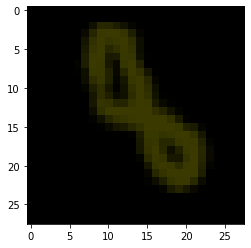

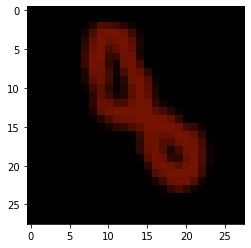

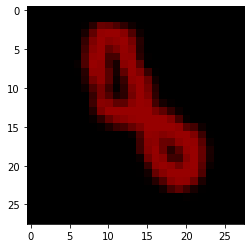

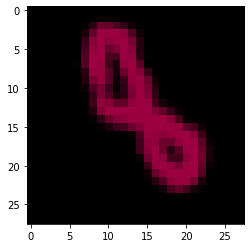

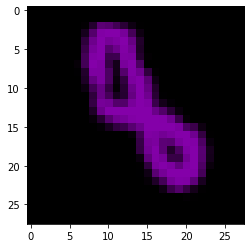

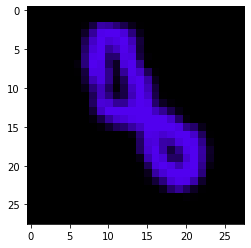

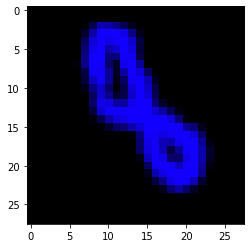

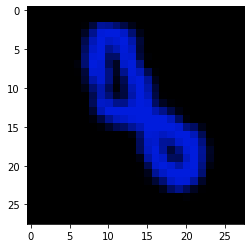

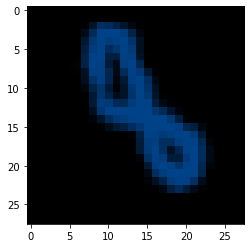

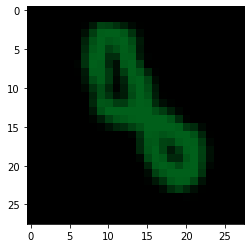

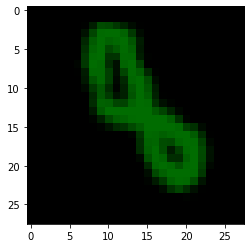

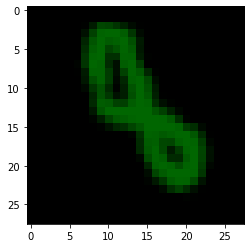

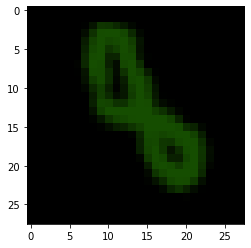

In [ ]:
for i in np.arange(-jnp.pi, jnp.pi, 0.5):
  plt.imshow(plotting_utils.rescale_for_imshow(color_transform_image(xs[0, 0], jnp.array([i, 1., 0., 1.]))))
  plt.show()

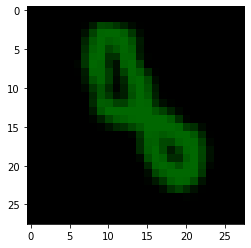

In [ ]:
plt.imshow(plotting_utils.rescale_for_imshow(hsv_transform_image(xs[0, 0], jnp.array([jnp.pi/2, 1.]))))

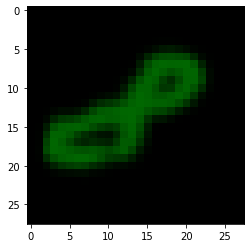

In [ ]:
plt.imshow(plotting_utils.rescale_for_imshow(transform_image(xs[0, 0], jnp.array([0., 0., jnp.pi/2, 0., .0, jnp.pi/2, 1.]))))